In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
titanic = pd.read_csv(r"D:\\SR\titanic.csv")
titanic.head()
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)


In [81]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [82]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [83]:
titanic = titanic.drop(columns="Cabin", axis=1)

In [45]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [46]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)

In [47]:
titanic["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [85]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7,S
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8,S


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

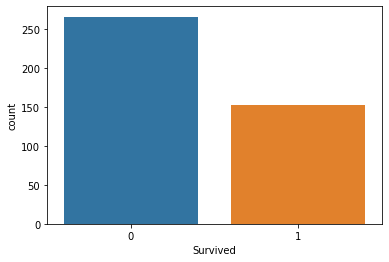

In [48]:
sns.countplot('Survived', data=titanic)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

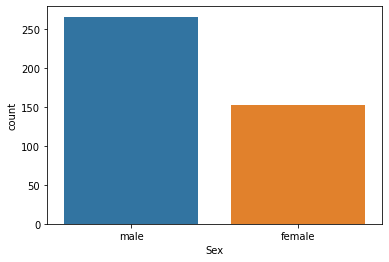

In [49]:
sns.countplot('Sex', data=titanic)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

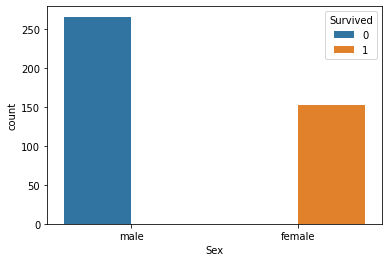

In [50]:
sns.countplot('Sex', hue="Survived", data=titanic)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

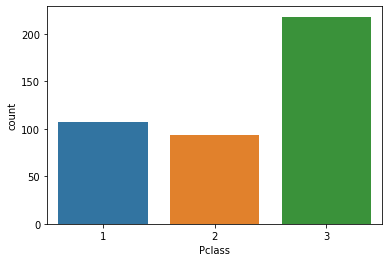

In [51]:
# cheking countplot for "Pclass" column
sns.countplot('Pclass', data=titanic)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

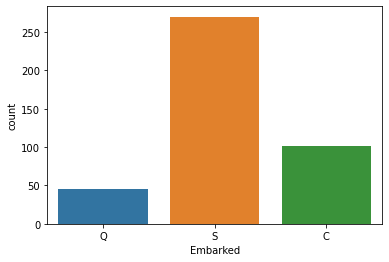

In [52]:
sns.countplot('Embarked', data=titanic)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

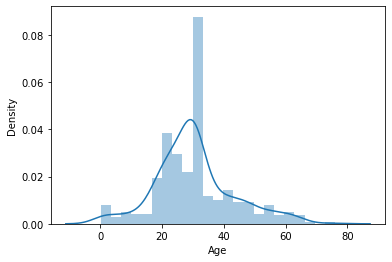

In [53]:
sns.distplot(titanic['Age'])

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

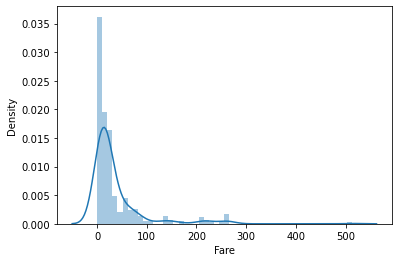

In [54]:
#checking for Fare column
sns.distplot(titanic['Fare'])

<AxesSubplot:>

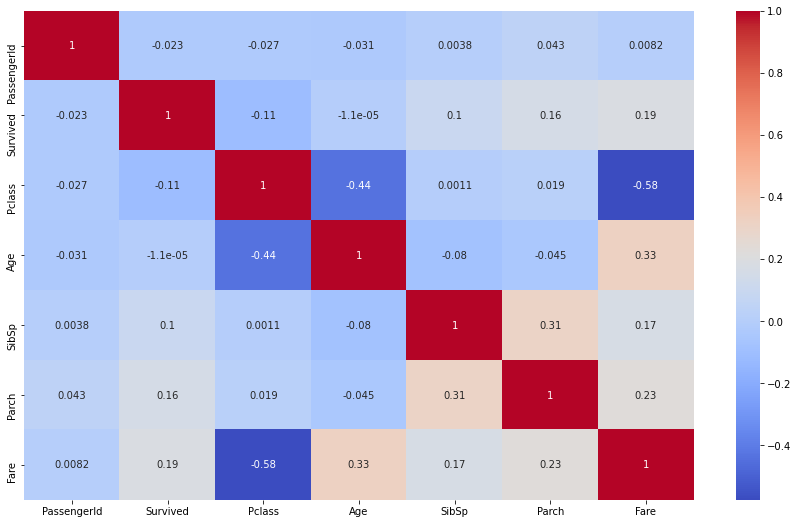

In [55]:
corr = titanic.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [57]:
## drop unnecessary columns
titanic = titanic.drop(columns=['Name', 'Ticket'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [58]:
titanic["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [59]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    titanic[col] = le.fit_transform(titanic[col])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


In [61]:
X = titanic.drop(columns = ['PassengerId','Survived'],axis=1)
Y = titanic['Survived']

In [62]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [63]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.26, random_state=42)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (309, 7) (109, 7)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
model = LogisticRegression()

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 26.2 KB


In [69]:
# Fill missing values with the mean of the column

# Convert to integers
titanic['Age'] = titanic['Age'].astype(int)
titanic['Fare'] = titanic['Fare'].astype(int)


In [70]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [72]:
print(X_train_prediction)

[1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0
 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0]


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Titanic dataset
titanic = pd.read_csv(r"D:\\SR\titanic.csv")
titanic.drop(['Name', 'Cabin','Ticket'], axis=1, inplace=True)
# Fill missing values in the 'Age' and 'Fare' columns with their respective means
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)
# Convert to integers
titanic['Age'] = titanic['Age'].astype(int)
titanic['Fare'] = titanic['Fare'].astype(int)
titanic['Sex'] = titanic['Sex'].map({'MALE': 0, 'FEMALE': 1})
titanic['Embarked'] = titanic['Embarked'].map({'Q': 0, 'S': 1})

titanic.fillna(0, inplace=True)
# Select features (X) and the target (Y)
X = titanic.drop(columns=['PassengerId', 'Survived'], axis=1)
Y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])

# Calculate confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)




Accuracy:  0.5952380952380952
Classification Report:
               precision    recall  f1-score   support

Not Survived       0.64      0.74      0.69        50
    Survived       0.50      0.38      0.43        34

    accuracy                           0.60        84
   macro avg       0.57      0.56      0.56        84
weighted avg       0.58      0.60      0.58        84

Confusion Matrix:
 [[37 13]
 [21 13]]


In [92]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0.0,34,0,0,7,0.0
1,893,1,3,0.0,47,1,0,7,1.0
2,894,0,2,0.0,62,0,0,9,0.0
3,895,0,3,0.0,27,0,0,8,1.0
4,896,1,3,0.0,22,1,1,12,1.0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0.0,30,0,0,8,1.0
414,1306,1,1,0.0,39,0,0,108,0.0
415,1307,0,3,0.0,38,0,0,7,1.0
416,1308,0,3,0.0,30,0,0,8,1.0


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Titanic dataset
titanic = pd.read_csv(r"D:\\SR\titanic.csv")
titanic.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Fill missing values in the 'Age' and 'Fare' columns with their respective means
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

# Convert to integers
titanic['Age'] = titanic['Age'].astype(int)
titanic['Fare'] = titanic['Fare'].astype(int)
titanic['Sex'] = titanic['Sex'].map({'MALE': 0, 'FEMALE': 1})
titanic['Embarked'] = titanic['Embarked'].map({'Q': 0, 'S': 1})

titanic.fillna(0, inplace=True)

# Select features (X) and the target (Y)
X = titanic.drop(columns=['PassengerId', 'Survived'], axis=1)
Y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors as needed

# Fit the classifier to the training data
knn_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])

# Calculate confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy:  0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

Not Survived       0.66      0.76      0.70        50
    Survived       0.54      0.41      0.47        34

    accuracy                           0.62        84
   macro avg       0.60      0.59      0.59        84
weighted avg       0.61      0.62      0.61        84

Confusion Matrix:
 [[38 12]
 [20 14]]


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Titanic dataset
titanic = pd.read_csv(r"D:\\SR\titanic.csv")
titanic.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Fill missing values in the 'Age' and 'Fare' columns with their respective means
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

# Convert to integers
titanic['Age'] = titanic['Age'].astype(int)
titanic['Fare'] = titanic['Fare'].astype(int)
titanic['Sex'] = titanic['Sex'].map({'MALE': 0, 'FEMALE': 1})
titanic['Embarked'] = titanic['Embarked'].map({'Q': 0, 'S': 1})

titanic.fillna(0, inplace=True)

# Select features (X) and the target (Y)
X = titanic.drop(columns=['PassengerId', 'Survived'], axis=1)
Y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_model = SVC()

# Fit the classifier to the training data
svm_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])

# Calculate confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy:  0.6071428571428571
Classification Report:
               precision    recall  f1-score   support

Not Survived       0.60      0.98      0.75        50
    Survived       0.67      0.06      0.11        34

    accuracy                           0.61        84
   macro avg       0.64      0.52      0.43        84
weighted avg       0.63      0.61      0.49        84

Confusion Matrix:
 [[49  1]
 [32  2]]


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Titanic dataset
titanic = pd.read_csv(r"D:\\SR\titanic.csv")
titanic.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Fill missing values in the 'Age' and 'Fare' columns with their respective means
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

# Convert to integers
titanic['Age'] = titanic['Age'].astype(int)
titanic['Fare'] = titanic['Fare'].astype(int)
titanic['Sex'] = titanic['Sex'].map({'MALE': 0, 'FEMALE': 1})
titanic['Embarked'] = titanic['Embarked'].map({'Q': 0, 'S': 1})

titanic.fillna(0, inplace=True)

# Select features (X) and the target (Y)
X = titanic.drop(columns=['PassengerId', 'Survived'], axis=1)
Y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived'])

# Calculate confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy:  0.5952380952380952
Classification Report:
               precision    recall  f1-score   support

Not Survived       0.64      0.74      0.69        50
    Survived       0.50      0.38      0.43        34

    accuracy                           0.60        84
   macro avg       0.57      0.56      0.56        84
weighted avg       0.58      0.60      0.58        84

Confusion Matrix:
 [[37 13]
 [21 13]]
